In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat 
import matplotlib.ticker as ticker
plt.style.use('seaborn')

In [3]:
lstmX = loadmat('matlab/优化的例子/lstm.mat')['resX']
lstmY = loadmat('matlab/优化的例子/lstm.mat')['resY']

In [4]:
arimaX = loadmat('matlab/优化的例子/arima.mat')['resX']
arimaY = loadmat('matlab/优化的例子/arima.mat')['resY']

In [5]:
lmX = loadmat('matlab/优化的例子/lm.mat')['resX']
lmY = loadmat('matlab/优化的例子/lm.mat')['resY']

In [6]:
gamX = loadmat('matlab/优化的例子/gam.mat')['resX']
gamY = loadmat('matlab/优化的例子/gam.mat')['resY']

In [7]:
archX = loadmat('matlab/优化的例子/arch.mat')['resX']
archY = loadmat('matlab/优化的例子/arch.mat')['resY']

In [8]:
df_lstm = pd.DataFrame(data=lstmX, 
    columns=['Dollar', 'Gold', 'BitCoin'])

In [9]:
df_lstm

,Dollar,Gold,BitCoin
0,0.183586,0.191628,0.624786
1,0.655478,0.089843,0.254679
2,0.195583,0.462606,0.341811
3,0.650127,0.338132,0.011741
4,0.245329,0.181502,0.573168
...,...,...,...
795,0.031284,0.926940,0.041775
796,0.144856,0.516658,0.338486
797,0.138767,0.210152,0.651081
798,0.002979,0.001079,0.995942


800天的日期设定

##  投资组合可视化

In [33]:
# 日期
date_range = pd.read_csv('../data/gold_complete.csv', index_col=0)['Date'].values

In [11]:
totals = [i+j+k for i,j,k in zip(df_lstm['Dollar'], df_lstm['Gold'], df_lstm['BitCoin'])]
Dollar = [i / j * 100 for i,j in zip(df_lstm['Dollar'], totals)]
Gold = [i / j * 100 for i,j in zip(df_lstm['Gold'], totals)]
BitCoin = [i / j * 100 for i,j in zip(df_lstm['BitCoin'], totals)]

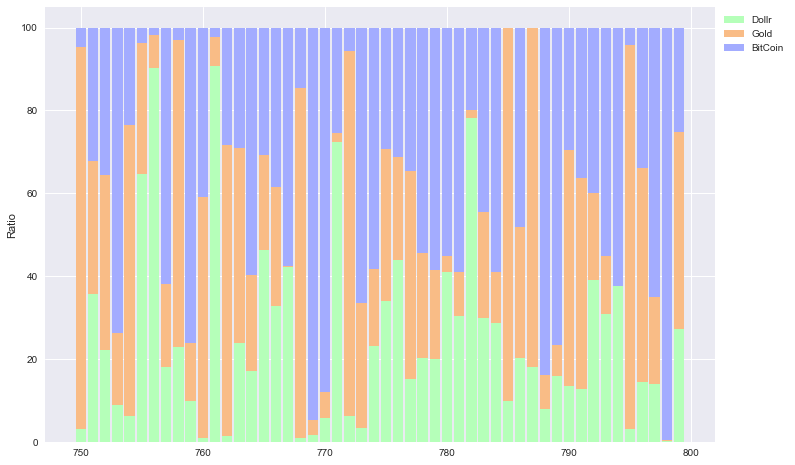

In [20]:
plt.figure(figsize=[12, 8])
lens = 50
barWidth = 0.85
r = range(len(Dollar))
plt.bar(r[-lens:], Dollar[-lens:], color='#b5ffb9', width=barWidth, label = 'Dollr')
plt.bar(r[-lens:], Gold[-lens:], bottom=Dollar[-lens:], color='#f9bc86', width=barWidth, label = 'Gold')
plt.bar(r[-lens:], BitCoin[-lens:], 
    bottom=[i+j for i,j in zip(Dollar[-lens:], Gold[-lens:])], color='#a3acff', width=barWidth, label = 'BitCoin')
plt.ylabel("Ratio")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

ValueError: 'f0f8ff' is neither a valid single color nor a color sequence consisting of single character color specifiers such as 'rgb'. Note also that the latter is deprecated.

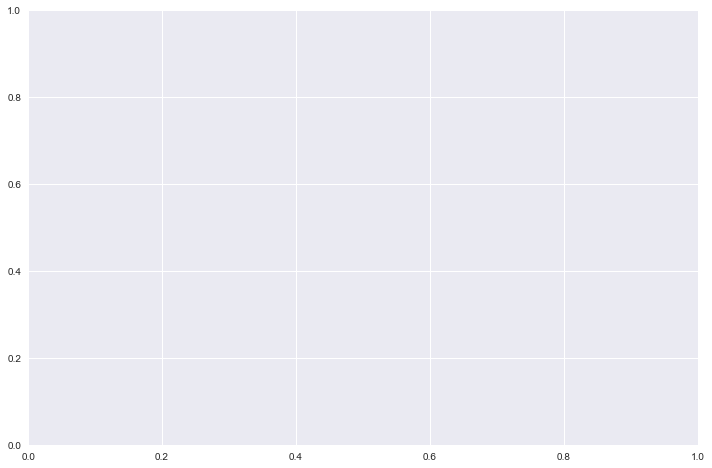

In [40]:
plt.figure(figsize=[12, 8])
lens = 50
barWidth = 0.85
r = range(len(Dollar))
plt.bar(r[-lens:], Dollar[-lens:],width=barWidth, label = 'Dollr', color='f0f8ff')
plt.bar(r[-lens:], Gold[-lens:], bottom=Dollar[-lens:], width=barWidth, label = 'Gold')
plt.bar(r[-lens:], BitCoin[-lens:], 
    bottom=[i+j for i,j in zip(Dollar[-lens:], Gold[-lens:])], width=barWidth, label = 'BitCoin')
plt.ylabel("Ratio")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

In [14]:
# 日期
date_range = pd.read_csv('../data/gold_complete.csv', index_col=0)[-50:]['Date'].values

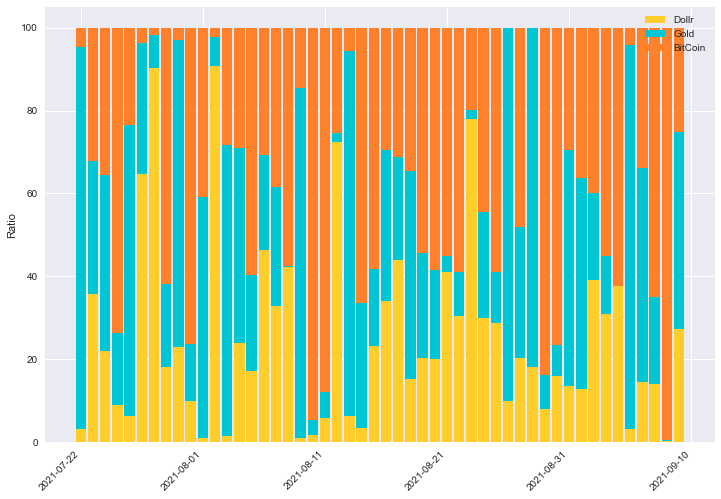

In [65]:
# 可视化
fig = plt.figure(figsize=[12, 8])
ax = fig.add_subplot(111)

lens = 50
barWidth = 0.85
r = range(len(Dollar))
ax.bar(r[-lens:], Dollar[-lens:], width=barWidth, label = 'Dollr',color = '#ffce2b')
ax.bar(r[-lens:], Gold[-lens:], bottom=Dollar[-lens:], width=barWidth, label = 'Gold',color='#00c5d2')
ax.bar(r[-lens:], BitCoin[-lens:], 
    bottom=[i+j for i,j in zip(Dollar[-lens:], Gold[-lens:])], width=barWidth, label = 'BitCoin',color='#ff812c')

# 设置坐标轴格式
def format_date(x, pos=None):
    x = x +1025
    if x < 0 or x > len(date_range):
        return ''
    return date_range[int(x)]
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
plt.legend(loc = 'best')
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Ratio')
plt.show()